### Time for K2SciCon!

N. Gosnell

We need to make some figures for the poster

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import pandas as pd
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

I want to recreate Gully's 3x3 spectra figure but with poster-appropriate asthetics 

In [2]:
import pandas as pd

In [3]:
all_avail = [106, 107, 109, 110, 113, 114, 116, 118, 119]
no_plots = [101]
ms_forward = np.array(list(set(all_avail) - set(no_plots)), dtype=np.int)
ms = ms_forward[::-1] # make it an even 9 plots.

In [4]:
len(ms), ms

(9, array([119, 118, 116, 114, 113, 110, 109, 107, 106]))

0
1
2
3
4
5
6
7
8


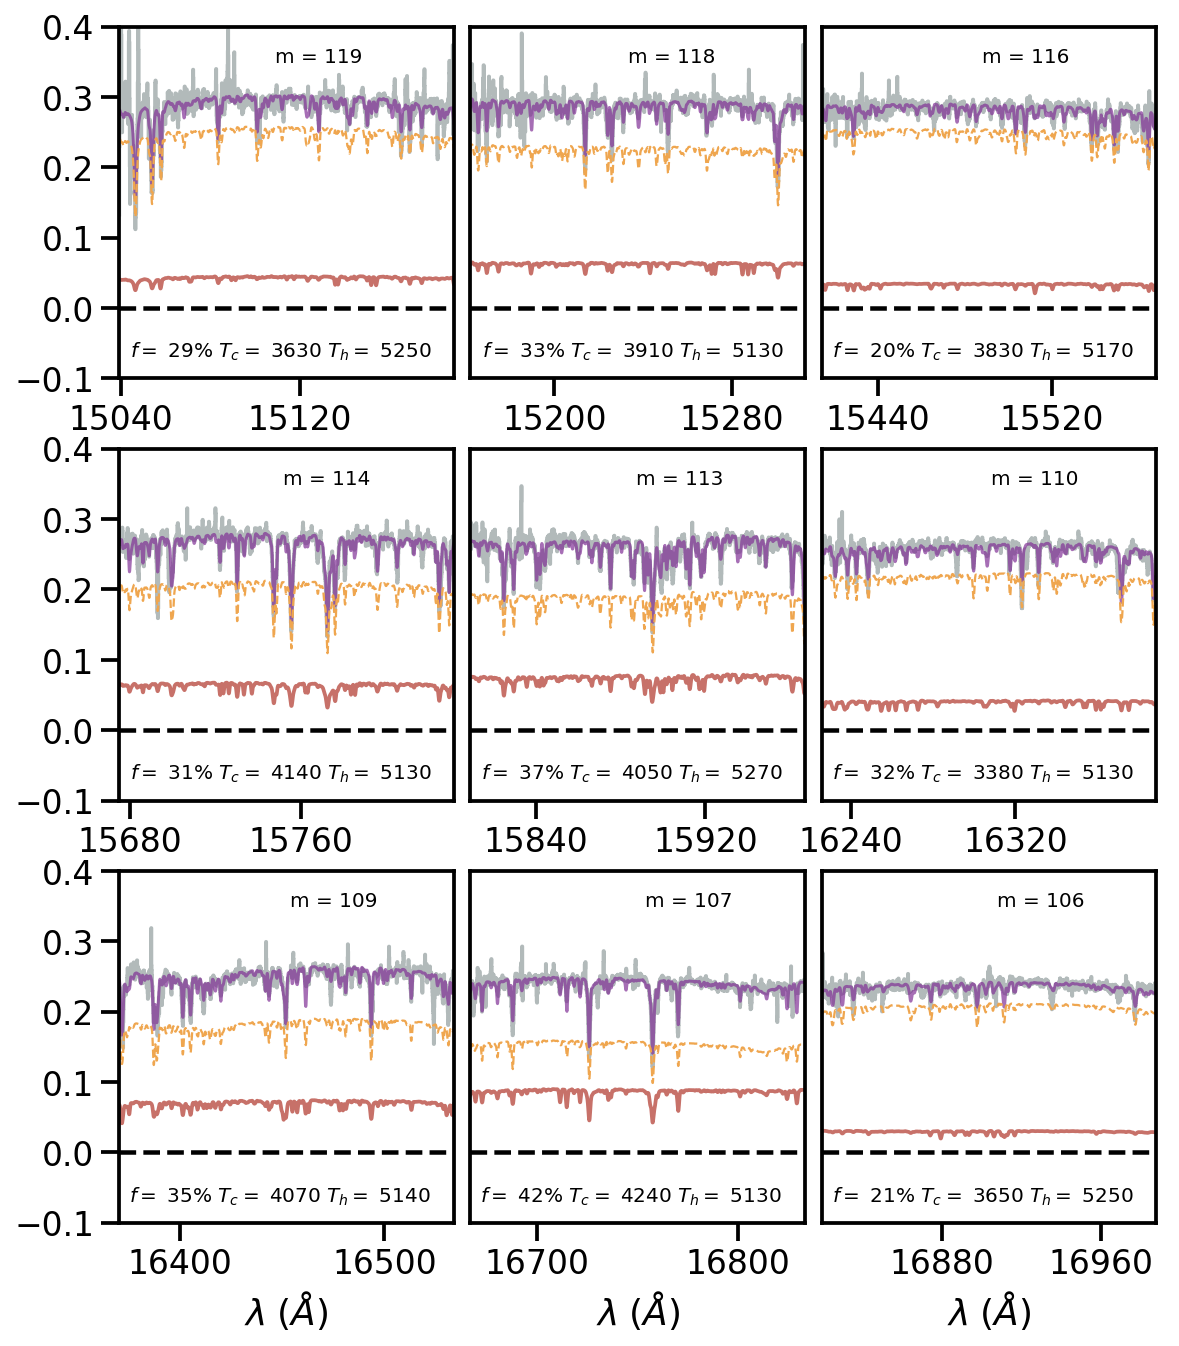

In [22]:
ii = -1
nrows = 3
ncols = 3
#----------------------------------------------------------------------
# Plot the results

sns.set_context("talk")

fig = plt.figure(figsize=(8.0, 11.0))

fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)

for j in range(ncols):
    for i in range(nrows):
        ii += 1
        print(ii)
        m = ms[ii]
        
        #label with the teff and fill factor of that order.
        try:
            with open('../sf/m{:03d}/output/mix_emcee/run02/models_ff-05_50_95.csv'.format(m)) as f:
                dat = pd.read_csv(f)
            ws = np.load("../sf/m{:03d}/output/mix_emcee/run02/emcee_chain.npy".format(m))
            burned = ws[:, -200:,:]
        except:
            ws = np.load("../sf/m{:03d}/output/mix_emcee/run01/emcee_chain.npy".format(m))
            burned = ws[:, -200:,:]
            with open('../sf/m{:03d}/output/mix_emcee/run01/models_ff-05_50_95.csv'.format(m)) as f:
                dat = pd.read_csv(f)

        xs, ys, zs = burned.shape
        fc = burned.reshape(xs*ys, zs)
        ff = 10**fc[:, 7]/(10**fc[:, 7]+10**fc[:, 5])
        inds_sorted = np.argsort(ff)
        fc_sorted = fc[inds_sorted]
        ps_med = fc_sorted[4000]
        fill_factor = 10**ps_med[7]/(10**ps_med[7]+10**ps_med[5])
        t_spot = ps_med[6]
        
        str1 = "$f =$ {:0.0%}, ".format(fill_factor) 
        str2 = "$T_{cool} = $" + "{:.0f}, ".format(ps_med[6])
        str3 = "$T_{hot} = $" + "{:.0f}$".format(ps_med[0])
        fmt_str = "$f =$ {:0.0%} $T_c =$ {:0.0f} $T_h =$ {:0.0f}"
        str_all = fmt_str.format(fill_factor, np.round(ps_med[6], -1), np.round(ps_med[0], -1))
        sample_label = str_all
        
        ax = fig.add_subplot(nrows, ncols, ncols * j + 1 + i)
        lw=0.75
        ax.step(dat['wl'], dat['data'], '-', color='#7f8c8d', linewidth=lw*2.5, alpha=0.6, label='IGRINS')
        ax.plot(dat['wl'], dat['model_comp50'], color='#813196', linewidth=lw*2, alpha=0.7, label='cool + hot')
        ax.plot(dat['wl'], dat['model_cool50'], '-', color='#C77169', linewidth=lw*2.5, label='cool')
        ax.plot(dat['wl'], dat['model_hot50'],  linestyle='dashed',color='#EFA64F', linewidth=lw*1.5, label='hot')
        ax.axhline(0, linestyle='dashed', color='#000000')

        if m != 100:
            ax.text(dat['wl'].values[-1]-80.0, 0.35, "m = {}".format(m), fontsize=10)
            ax.text(dat['wl'].values[0]+5.0, -0.07, sample_label, fontsize=10)

        #ax.yaxis.set_major_formatter(plt.NullFormatter())
        ax.set_yscale('linear')
        ax.set_ylim(-0.1, 0.4)
        ax.set_xlim(dat.wl[0], dat.wl.iloc[-1])
        if i > 0:
            ax.yaxis.set_major_locator(plt.NullLocator())
            ax.yaxis.set_major_formatter(plt.NullFormatter())

        ax.xaxis.set_major_locator(plt.MaxNLocator(2))
        if j > (nrows - 2):
            plt.xlabel(r'$\lambda \; (\AA)$')
            
        if m == 100:
            ax.set_ylim(-100, -200)
            plt.legend(loc='center', ncol=1, frameon=False, fontsize=25)
            ax.axis('off')

plt.savefig('../document/figures/H_band_spectra_3x3_poster.pdf', bbox_inches='tight', dpi=300, transparent=True)